In [1]:
import requests
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [ ]:
load_dotenv() # Get the .env file

blockchain_url = 'https://api.blockchain.info/charts/hash-rate' # Blockchain API endpoint we will be using

In [15]:
params = {
    "timespan": "all",        # todo el histórico
    "format": "json",
    "rollingAverage": "7days",         # o "csv" 
    "sampled": "false"        # para que no reduzca datapoints
}
response = requests.get(url=blockchain_url, params=params) # url + specified params
response.raise_for_status()
data = response.json() # Parse the JSON

In [14]:
print(data)

{'status': 'ok', 'name': 'Hash Rate', 'unit': 'Hash Rate TH/s', 'period': 'day', 'description': 'The estimated number of tera hashes per second (trillions of hashes per second) the Bitcoin network is performing.', 'values': [{'x': 1230940800, 'y': 4.97102696296296e-08}, {'x': 1231027200, 'y': 0.0}, {'x': 1231113600, 'y': 0.0}, {'x': 1231200000, 'y': 0.0}, {'x': 1231286400, 'y': 0.0}, {'x': 1231372800, 'y': 0.0}, {'x': 1231459200, 'y': 6.95943774814815e-07}, {'x': 1231545600, 'y': 1.54101835851852e-06}, {'x': 1231632000, 'y': 5.26928858074074e-06}, {'x': 1231718400, 'y': 4.42421399703704e-06}, {'x': 1231804800, 'y': 5.71668100740741e-06}, {'x': 1231891200, 'y': 6.26349397333333e-06}, {'x': 1231977600, 'y': 6.31320424296296e-06}, {'x': 1232064000, 'y': 5.76639127703704e-06}, {'x': 1232150400, 'y': 5.36870912e-06}, {'x': 1232236800, 'y': 5.02073723259259e-06}, {'x': 1232323200, 'y': 5.91552208592593e-06}, {'x': 1232409600, 'y': 5.76639127703704e-06}, {'x': 1232496000, 'y': 5.6172604681481

In [ ]:
values = data['values']

df = pd.DataFrame(values)

df['x'] = pd.to_datetime(df['x'], unit='s')     # Convert to date type
df['y'] = pd.to_numeric(df['y'], errors='coerce')  # Convert tu numeric type

In [18]:
print(df['x'])

0      2009-01-10
1      2009-01-11
2      2009-01-12
3      2009-01-13
4      2009-01-14
          ...    
6062   2025-08-16
6063   2025-08-17
6064   2025-08-18
6065   2025-08-19
6066   2025-08-20
Name: x, Length: 6067, dtype: datetime64[ns]


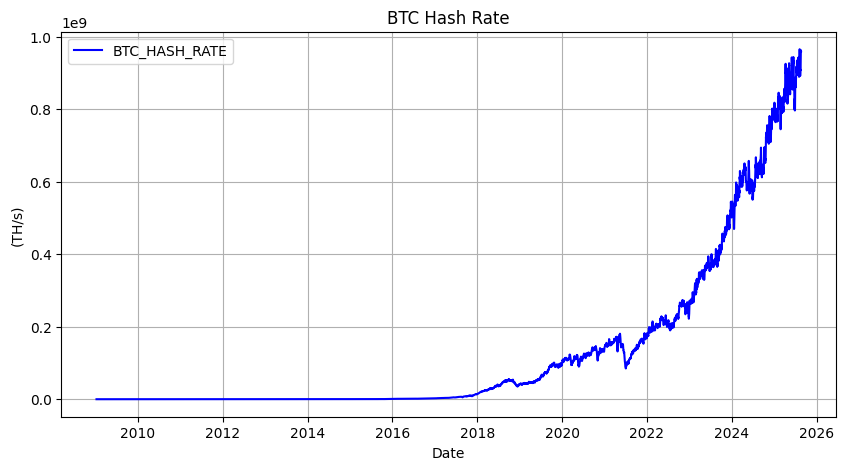

In [19]:
plt.figure(figsize=(10,5))
plt.plot(df['x'], df['y'], label='BTC_HASH_RATE', color='blue')

plt.title('BTC Hash Rate')
plt.xlabel('Date')
plt.ylabel('(TH/s)')
plt.legend()
plt.grid(True)
plt.show()